In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip
  

--2020-08-02 14:47:33--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 173.194.217.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   169MB/s    in 0.8s    

2020-08-02 14:47:34 (169 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2020-08-02 14:47:36--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 64.233.170.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Leng

In [2]:
import os 
import zipfile 

In [4]:
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')

In [5]:
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')

In [6]:
zip_ref.close()

In [9]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our validation horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our validation human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [10]:
import tensorflow as tf

In [12]:
model = tf.keras.models.Sequential([
  # 1st conv net 
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape = (300, 300, 3)), 
  tf.keras.layers.MaxPooling2D(2,2),

  # 2nd Conv
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'), 
  tf.keras.layers.MaxPooling2D(2,2),

  # 3rd Conv
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
  tf.keras.layers.MaxPooling2D(2,2), 
  
  # 4th Conv 
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
  tf.keras.layers.MaxPooling2D(2,2), 

  # 5th Conv
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
  tf.keras.layers.MaxPooling2D(2,2), 

  # Flattern layers
  tf.keras.layers.Flatten(), 

  # 512 neuron hidden layer
  tf.keras.layers.Dense(units=512, activation='relu'), 

  # output layer
  tf.keras.layers.Dense(units=1, activation='sigmoid')

])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 33, 33, 64)        3

In [19]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255, 
    rotation_range = 40, 
    width_shift_range = 0.2, 
    height_shift_range = 0.2, 
    shear_range = 0.2, 
    zoom_range = 0.2, 
    horizontal_flip = True, 
    fill_mode = 'nearest'
)

In [20]:
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255
)

In [21]:
train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/', 
    target_size = (300, 300), 
    batch_size = 128, 
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


In [22]:
validation_generator = `

Found 256 images belonging to 2 classes.


In [24]:
model.compile(
    optimizer = tf.keras.optimizers.RMSprop(lr = 1e-4), 
    loss = 'binary_crossentropy', 
    metrics = ['accuracy']
)

In [25]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=100,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/100
8/8 [==============================] - 21s 3s/step - loss: 0.6901 - accuracy: 0.5362 - val_loss: 0.6755 - val_accuracy: 0.7227
Epoch 2/100
8/8 [==============================] - 20s 3s/step - loss: 0.6752 - accuracy: 0.6719 - val_loss: 0.7317 - val_accuracy: 0.5000
Epoch 3/100
8/8 [==============================] - 23s 3s/step - loss: 0.6632 - accuracy: 0.5918 - val_loss: 0.6326 - val_accuracy: 0.5273
Epoch 4/100
8/8 [==============================] - 23s 3s/step - loss: 0.6345 - accuracy: 0.6919 - val_loss: 0.5916 - val_accuracy: 0.6133
Epoch 5/100
8/8 [==============================] - 21s 3s/step - loss: 0.5973 - accuracy: 0.6930 - val_loss: 0.5652 - val_accuracy: 0.6289
Epoch 6/100
8/8 [==============================] - 20s 3s/step - loss: 0.5528 - accuracy: 0.7275 - val_loss: 0.5189 - val_accuracy: 0.7031
Epoch 7/100
8/8 [==============================] - 20s 3s/step - loss: 0.5768 - accuracy: 0.6885 - val_loss: 0.5473 - val_accuracy: 0.6484
Epoch 8/100
8/8 [==========

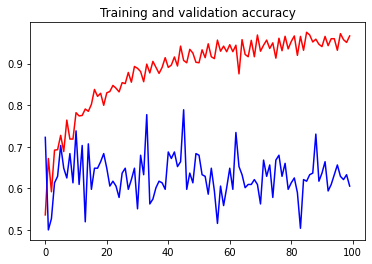

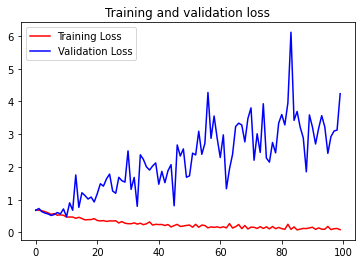

In [26]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()